# Machine Learning Model

---

### Essential Libraries

We begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Sklearn : Library for Prediction Models

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency

## Loading the updated dataset

In [25]:
lungdata=pd.read_csv('lung_cleaned2.csv')
lungdata

,Air Pollution,Alcohol use,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,3,2,4,3,2,2,4,3,1
1,3,1,4,2,2,2,4,2,3,1,2
2,4,5,5,6,7,2,3,4,8,8,3
3,7,7,6,7,7,7,7,7,8,4,3
4,6,8,7,7,7,8,7,7,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...
985,6,7,7,7,7,7,8,7,7,5,3
986,6,8,7,7,7,7,8,7,7,9,3
987,4,5,5,6,7,2,3,4,8,8,3
988,6,8,7,7,7,8,7,7,9,3,3


## Using these predictors to predict severity of lung cancer

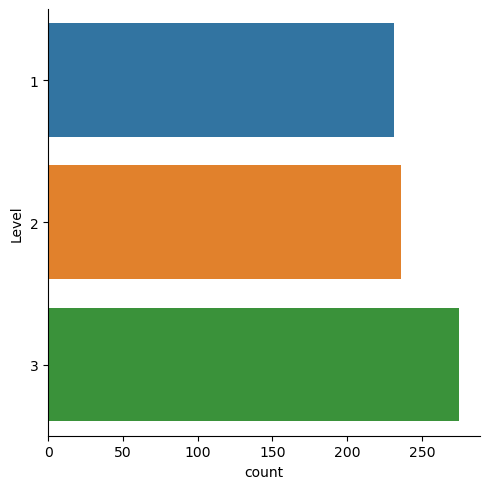

In [26]:
predictors = ["Air Pollution","Alcohol use", "Genetic Risk","Balanced Diet","Obesity", "Smoking", "Passive Smoker", "Chest Pain","Coughing of Blood","Fatigue"]
y = pd.DataFrame(lungdata['Level'].astype('category'))
X = pd.DataFrame(lungdata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Level", data = y_train, kind = "count")

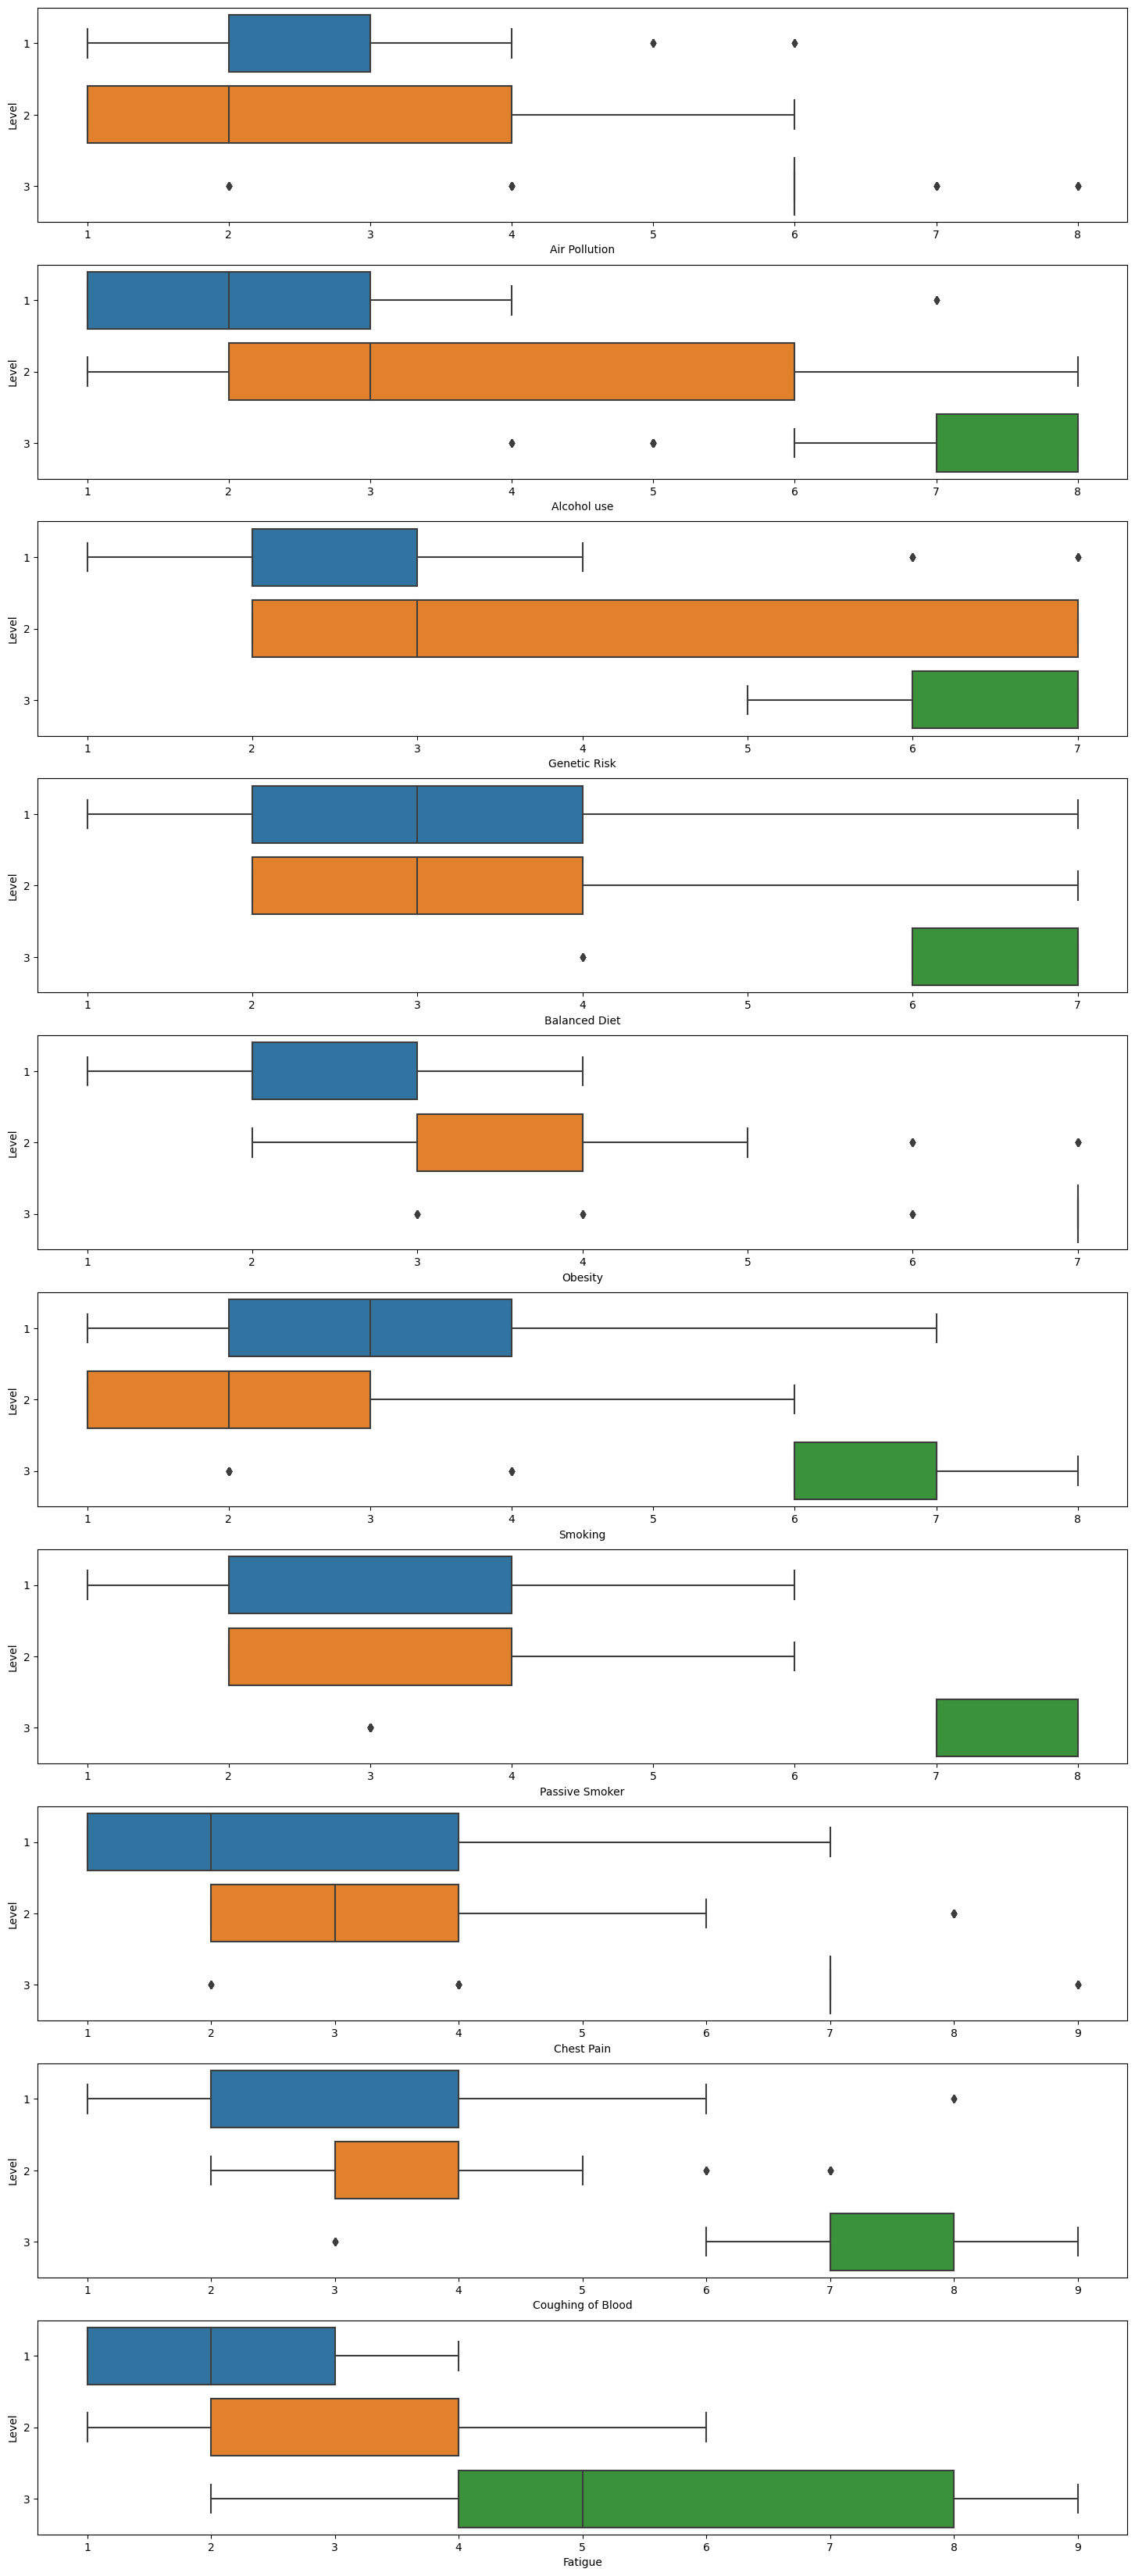

In [27]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(10, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Level", data = trainDF, orient = "h", ax = axes[count])
    count += 1

## Training the Multi Class Decision Tree

In [28]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9555256064690026

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9717741935483871



<AxesSubplot:>

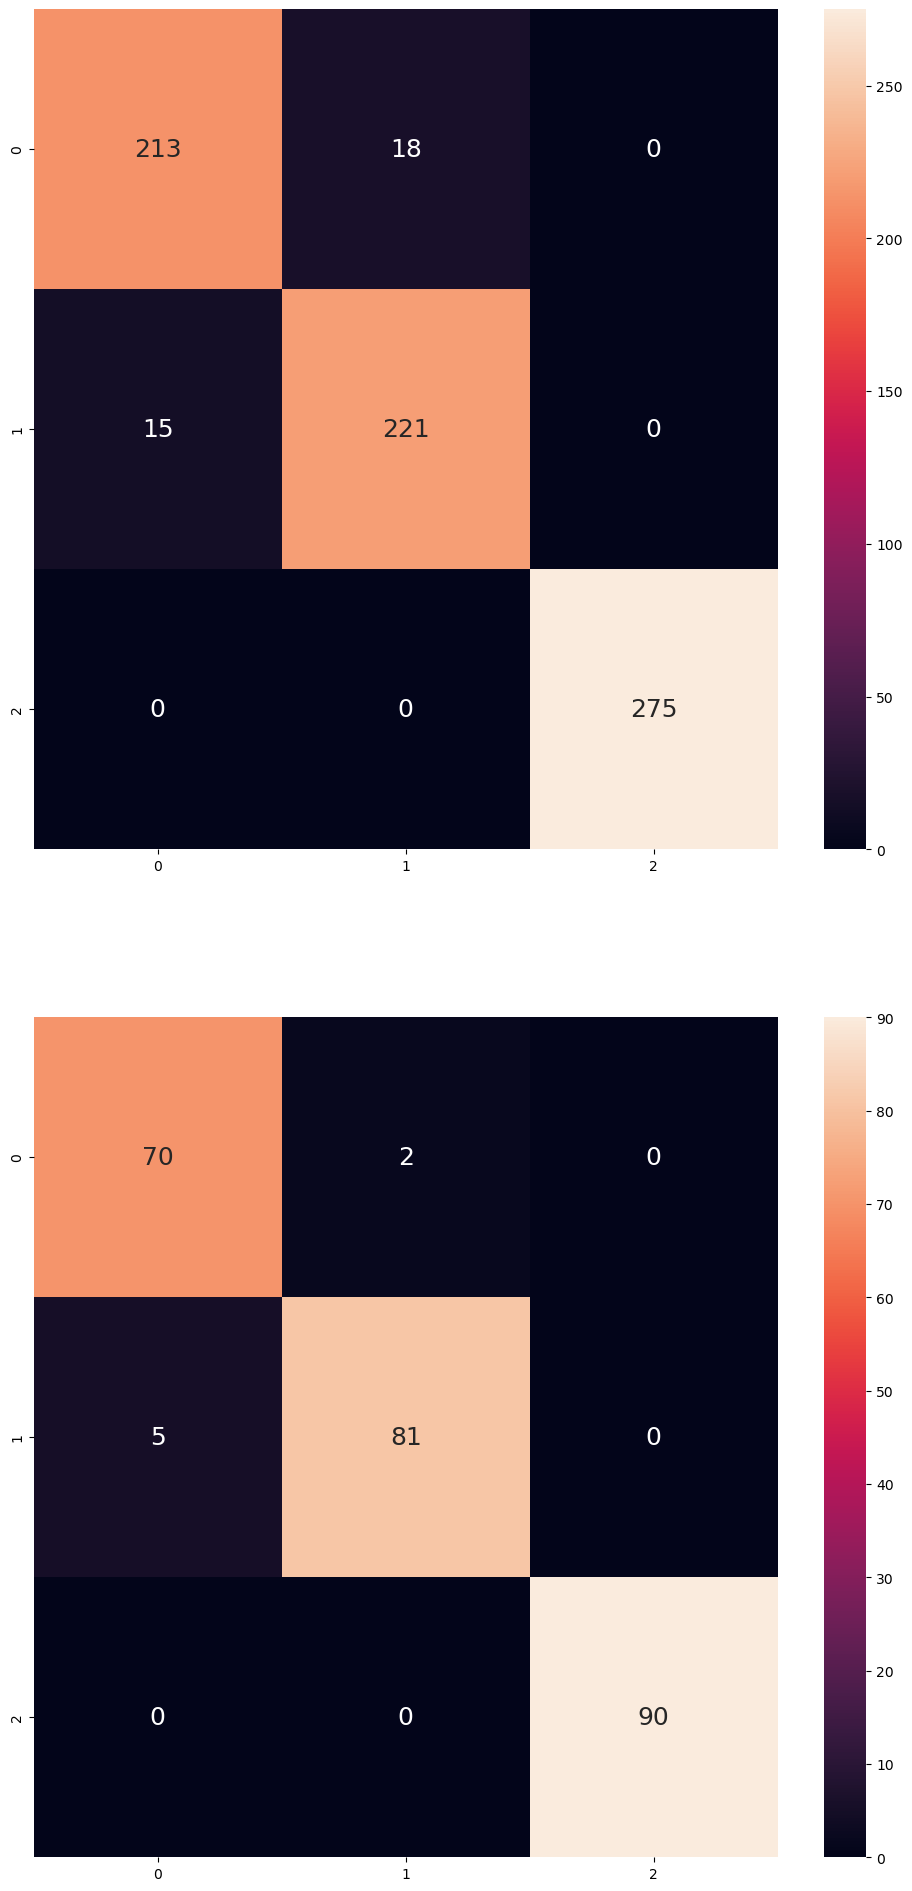

In [29]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### The classification accuracy of the model is very high for both train and test dataset (close to 0.96), suggesting this model will be able to predict the severity of lung cancer accurately most of the times.

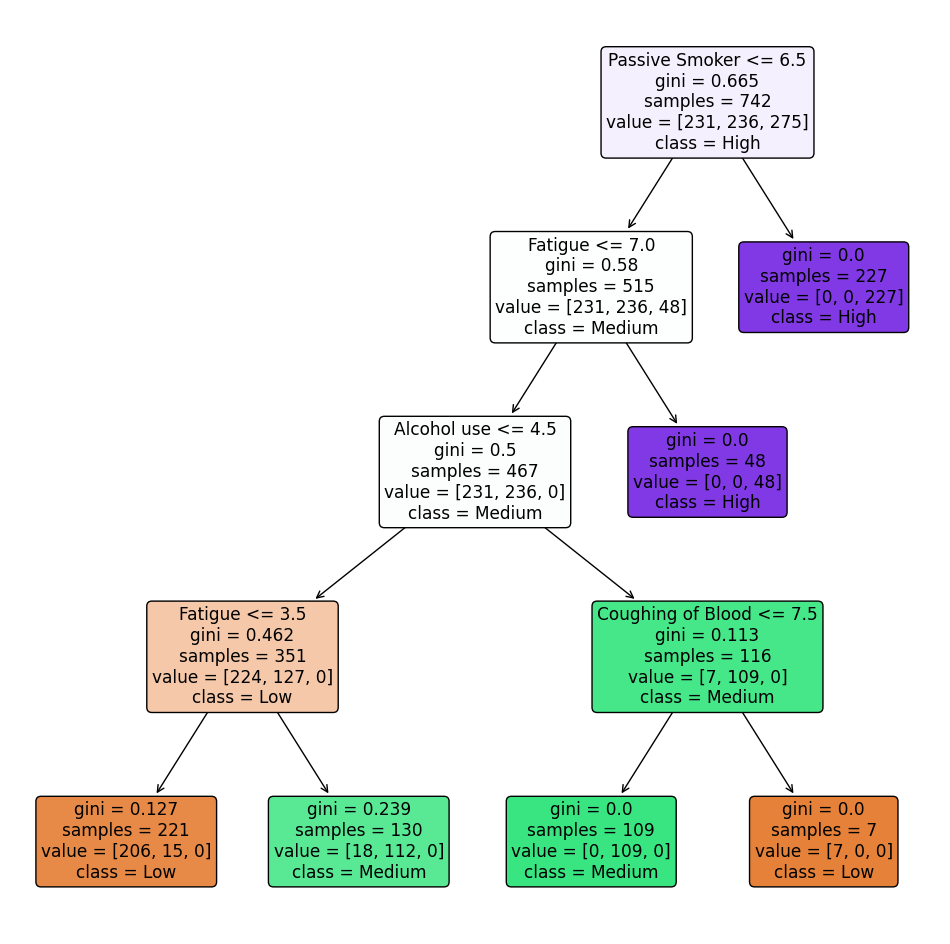

In [30]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f=plt.figure(figsize=(12,12))
y=plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Low","Medium","High"])

## Probability of Predictions

In [31]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(lungdata[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)

In [32]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = lungdata.index)
lungdata_acc = pd.concat([lungdata[["Level"]], y_pred], axis = 1)

lungdata_acc

,Level,PredType
0,1,1
1,2,1
2,3,3
3,3,3
4,3,3
...,...,...
985,3,3
986,3,3
987,3,3
988,3,3


In [33]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 2)
y_prob


array([[0.93, 0.07, 0.  ],
       [0.93, 0.07, 0.  ],
       [0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

#### From the probability array, we can tell that the multi class classification tree model is able to predict the severity of lung cancer quite accurately. This is shown in the array where for most cases, the probability of predicting the right severity level is very high.

## Testing Model with user Input Data

In [39]:
def input_patient_data():
    feature_names = [col for col in lungdata if col not in ['Level']]

    print("Enter the number of patients:")
    num_patients = int(input())

    patient_data = []

    for i in range(num_patients):
        print(f"\nEnter data for patient {i + 1}:")

        patient_features = []
        for feature_name in feature_names:
            print(f"Enter rating for {feature_name} (1-10):")
            feature_value = int(input())
            patient_features.append(feature_value)

        patient_data.append(patient_features)

    return patient_data

patient_data = input_patient_data()
severity_level = ['Low', 'Medium', 'High']
# Process and make predictions for each patient
for i, patient_features in enumerate(patient_data):
    input_data_array = np.array(patient_features).reshape(1, -1)
    predicted_level = dectree.predict(input_data_array)
    print(f"Predicted Severity Level for patient {i + 1}: {severity_level[int(predicted_level)-1]}")

Enter the number of patients:
3

Enter data for patient 1:
Enter rating for Air Pollution (1-10):
1
Enter rating for Alcohol use (1-10):
1
Enter rating for Genetic Risk (1-10):
1
Enter rating for Balanced Diet (1-10):
1
Enter rating for Obesity (1-10):
1
Enter rating for Smoking (1-10):
1
Enter rating for Passive Smoker (1-10):
1
Enter rating for Chest Pain (1-10):
1
Enter rating for Coughing of Blood (1-10):
1
Enter rating for Fatigue (1-10):
1

Enter data for patient 2:
Enter rating for Air Pollution (1-10):
5
Enter rating for Alcohol use (1-10):
5
Enter rating for Genetic Risk (1-10):
5
Enter rating for Balanced Diet (1-10):
5
Enter rating for Obesity (1-10):
5
Enter rating for Smoking (1-10):
5
Enter rating for Passive Smoker (1-10):
5
Enter rating for Chest Pain (1-10):
5
Enter rating for Coughing of Blood (1-10):
5
Enter rating for Fatigue (1-10):
5

Enter data for patient 3:
Enter rating for Air Pollution (1-10):
10
Enter rating for Alcohol use (1-10):
10
Enter rating for Geneti

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\bryan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
